In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('covid_data.csv')
df.head()

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds,Available ICU Beds,Potentially Available ICU Beds,Adult Population,Population 65+,Projected Infected Individuals,Projected Hospitalized Individuals,Projected Individuals Needing ICU Care
0,"Abilene, TX",980.0,127.0,565.0,772.0,68.0,98.0,226444.0,50412.0,45289.0,9563.0,2090.0
1,"Akron, OH",1358.0,186.0,518.0,938.0,94.0,140.0,547990.0,111042.0,109598.0,22933.0,4959.0
2,"Alameda County, CA",2695.0,293.0,665.0,1680.0,139.0,216.0,1310189.0,214991.0,262038.0,53872.0,11400.0
3,"Albany, GA",704.0,60.0,221.0,462.0,27.0,43.0,157143.0,30466.0,31429.0,6550.0,1410.0
4,"Albany, NY",4804.0,425.0,1579.0,3191.0,193.0,309.0,1477723.0,318695.0,295545.0,62209.0,13545.0


In [42]:
df.columns


Index(['HRR', 'Total Hospital Beds', 'Total ICU Beds',
       'Available Hospital Beds', 'Potentially Available Hospital Beds',
       'Available ICU Beds', 'Potentially Available ICU Beds',
       'Adult Population', 'Population 65+', 'Projected Infected Individuals',
       'Projected Hospitalized Individuals',
       'Projected Individuals Needing ICU Care'],
      dtype='object')

In [43]:
df.dtypes

HRR                                        object
Total Hospital Beds                       float64
Total ICU Beds                            float64
Available Hospital Beds                   float64
Potentially Available Hospital Beds       float64
Available ICU Beds                        float64
Potentially Available ICU Beds            float64
Adult Population                          float64
Population 65+                            float64
Projected Infected Individuals            float64
Projected Hospitalized Individuals        float64
Projected Individuals Needing ICU Care    float64
dtype: object

In [45]:
df.isnull().sum()

HRR                                       0
Total Hospital Beds                       0
Total ICU Beds                            0
Available Hospital Beds                   0
Potentially Available Hospital Beds       0
Available ICU Beds                        0
Potentially Available ICU Beds            0
Adult Population                          0
Population 65+                            0
Projected Infected Individuals            0
Projected Hospitalized Individuals        0
Projected Individuals Needing ICU Care    0
dtype: int64

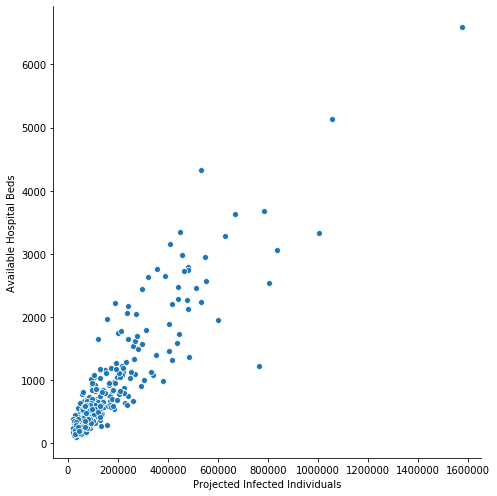

In [68]:
sns.relplot('Projected Infected Individuals', 'Available Hospital Beds', data = df, height = 7)
#this plot shows the need of the beds sa the covid patients will increase 

In [67]:
df.columns

Index(['HRR', 'Total Hospital Beds', 'Total ICU Beds',
       'Available Hospital Beds', 'Potentially Available Hospital Beds',
       'Available ICU Beds', 'Potentially Available ICU Beds',
       'Adult Population', 'Population 65+', 'Projected Infected Individuals',
       'Projected Hospitalized Individuals',
       'Projected Individuals Needing ICU Care'],
      dtype='object')

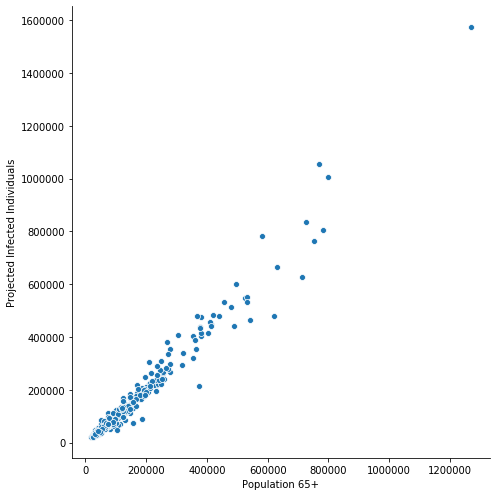

In [70]:
sns.relplot('Population 65+', 'Projected Infected Individuals', data = df, height = 7)
# as the population in any place increases the number of infected people also increases

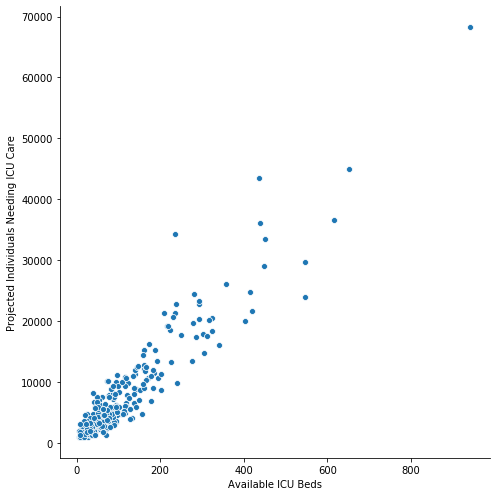

In [71]:
sns.relplot('Available ICU Beds', 'Projected Individuals Needing ICU Care', data = df, height = 7)
# this shows that the need of ICU beds are moer than the available ICU beds, we need to get more of these

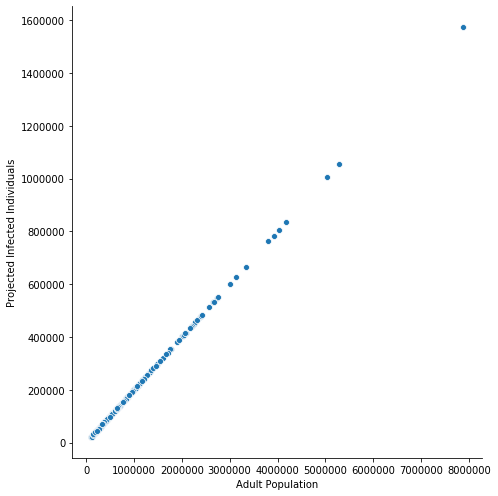

In [72]:
sns.relplot('Adult Population', 'Projected Infected Individuals', data = df, height = 7)

#shows that as the adult population increases the number of infected people also increases.

In [87]:
#now as we can see population65+ and adult population are directly related to the total infected individual we can now form a prediction
X = df[['Adult Population', 'Population 65+']].values
len(X)

305

In [82]:
y = df['Projected Infected Individuals'].values
y[:10]

array([ 45289., 109598., 262038.,  31429., 295545., 267359.,  44319.,
       192114.,  46912.,  66534.])

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)


In [85]:
len(X_train)

213

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
model = LinearRegression()

In [90]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
model.score(X_test, y_test)

0.9999999999968004